In [ ]:
import pandas as pd
import numpy as np

# Reading in the Dataframe for use

In [ ]:
df = pd.read_csv('bees_basic_collector_data.csv')

In [ ]:
df

,id,recordedBy,identifiedBy,country,year,month,day
0,http://n2t.net/ark:/65665/300030cb7-f6da-4dc3-...,E. Stiles,NaN,United States,1970.0,7.0,3.0
1,http://n2t.net/ark:/65665/3000386db-3651-49b8-...,L. Macior,NaN,United States,1974.0,4.0,28.0
2,http://n2t.net/ark:/65665/30003be57-6cf7-4e31-...,T. Kincaid,NaN,United States,1897.0,8.0,1.0
3,http://n2t.net/ark:/65665/3000427d0-37c4-4d9e-...,L. Macior,NaN,United States,1968.0,6.0,10.0
4,http://n2t.net/ark:/65665/30004595f-cd68-4adb-...,L. Macior,NaN,United States,1966.0,7.0,21.0
...,...,...,...,...,...,...,...
73492,http://n2t.net/ark:/65665/3fff988ef-3dd8-44ad-...,NaN,NaN,United States,1962.0,8.0,25.0
73493,http://n2t.net/ark:/65665/3fffa0ce6-efb9-4ebf-...,P. Teles,"Hurd, P. D.",Brazil,1954.0,7.0,9.0
73494,http://n2t.net/ark:/65665/3fffb0495-4ab8-4c95-...,L. Macior,NaN,Canada,1971.0,7.0,26.0
73495,http://n2t.net/ark:/65665/3fffc05e0-5d7a-460c-...,L. Macior,NaN,United States,1968.0,5.0,30.0


# Dropping NAs from identified by and recorded by

In [ ]:
df_cleaned = df.dropna(subset=['identifiedBy'])
df_cleaned = df_cleaned.dropna(subset=['recordedBy'])

In [ ]:
df_cleaned

,id,recordedBy,identifiedBy,country,year,month,day
6,http://n2t.net/ark:/65665/3000513bb-73ae-48ed-...,Friese,Friese,Austria,1909.0,NaN,NaN
13,http://n2t.net/ark:/65665/3000af55b-23c5-4269-...,[Not Stated],Franklin,United States,1899.0,7.0,10.0
18,http://n2t.net/ark:/65665/3000db554-556b-4df0-...,D. Graham,Frison,China,1930.0,8.0,13.0
25,http://n2t.net/ark:/65665/3001197d3-47fb-4211-...,R. Washburn,Milliron,United States,1954.0,6.0,18.0
49,http://n2t.net/ark:/65665/3002871b4-5188-4eb1-...,J. Clarke,"Miller, R. B.",United States,1955.0,6.0,29.0
...,...,...,...,...,...,...,...
73472,http://n2t.net/ark:/65665/3ffeafeda-7208-444a-...,[Not Stated],Franklin,United States,1901.0,5.0,NaN
73473,http://n2t.net/ark:/65665/3ffebca98-5e2e-4493-...,M. Kisliuk,"Sandhouse, G.",Argentina,1927.0,4.0,20.0
73476,http://n2t.net/ark:/65665/3ffee0c00-d74f-4ad2-...,D. Graham,Frison,China,1929.0,7.0,NaN
73485,http://n2t.net/ark:/65665/3fff3d879-8356-4892-...,R. Washburn,Milliron,United States,1959.0,8.0,29.0


# Setting up the Network Graph

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
G = nx.from_pandas_edgelist(df_cleaned, 'identifiedBy', 'recordedBy')


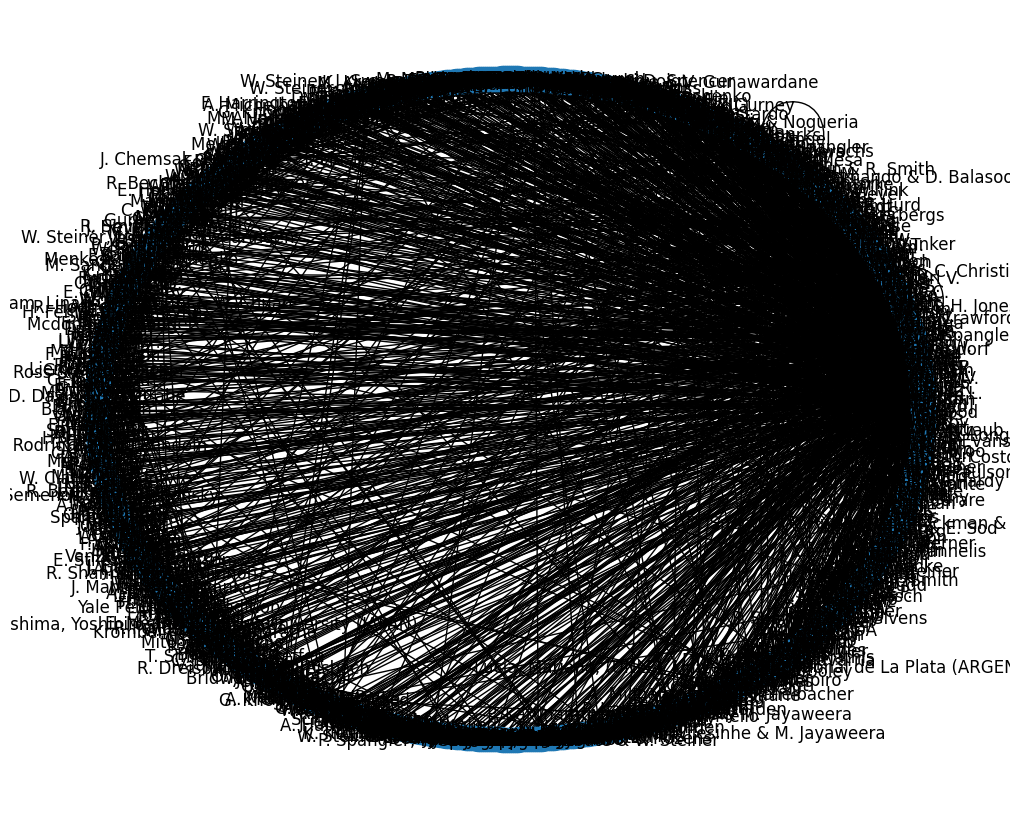

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_circular(G, with_labels=True)

#Finding the top participants for identification and recording



In [ ]:
df_counts_id = df.groupby(['identifiedBy'])['identifiedBy'].count()
id_top = df_counts_id.sort_values(ascending = False)
id_top = id_top.head()
id_top

identifiedBy
Miller, R. B.    2031
Franklin         1211
Milliron          949
Hurd, P. D.       664
Czarnik, S.       495
Name: identifiedBy, dtype: int64

In [ ]:
df_counts_rec = df.groupby(['recordedBy'])['recordedBy'].count()
rec_top = df_counts_rec.sort_values(ascending = False)
rec_top = rec_top.head()
rec_top

recordedBy
L. Macior       31893
D. Graham        4558
[Not Stated]     4271
J. Bridwell      2151
J. Clarke        1594
Name: recordedBy, dtype: int64

#Finding the collaborators of Czarnik

In [ ]:
df_czarnik = df_cleaned[df_cleaned['identifiedBy']=='Czarnik, S.']

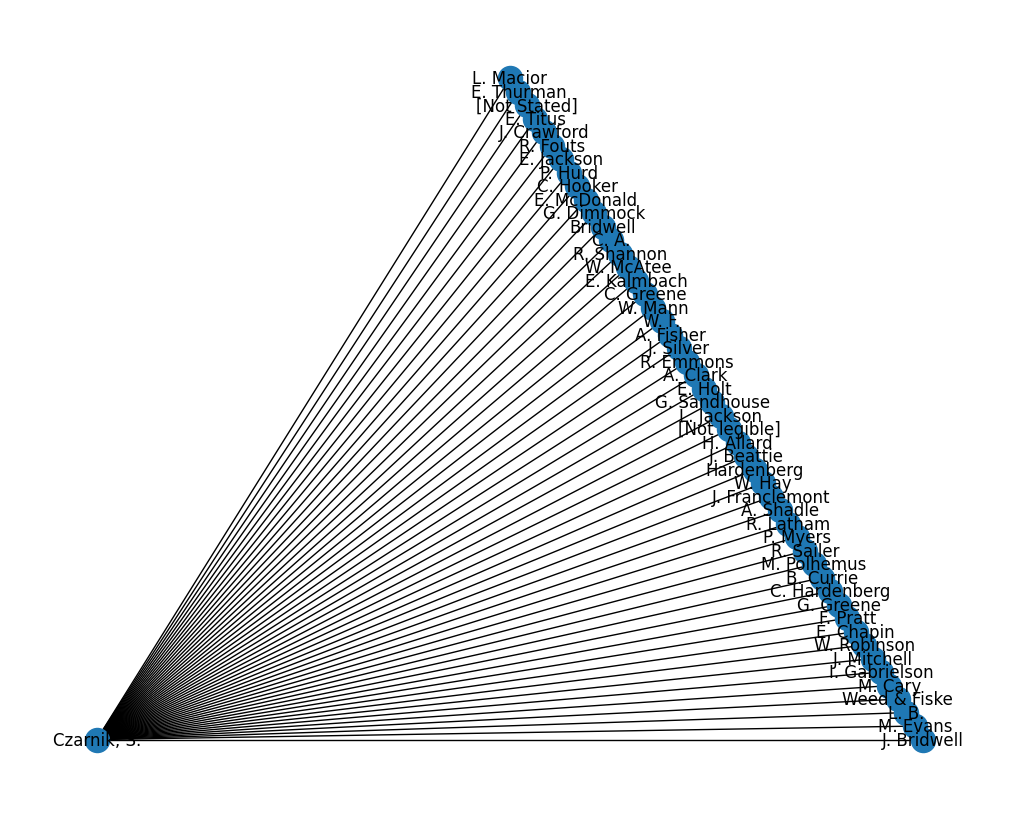

In [ ]:
G = nx.from_pandas_edgelist(df_czarnik, 'identifiedBy', 'recordedBy')
figure(figsize=(10, 8))
nx.draw_planar(G, with_labels=True)

In [ ]:
df_czarnik_collab = df_cleaned[(df_cleaned['identifiedBy']=='Czarnik, S.') & (df_cleaned['recordedBy']=='M. Cary')]
df_czarnik_collab

,id,recordedBy,identifiedBy,country,year,month,day
60126,http://n2t.net/ark:/65665/3d11cffd2-380a-4c22-...,M. Cary,"Czarnik, S.",Canada,1903.0,8.0,6.0


#Finding contemporaries

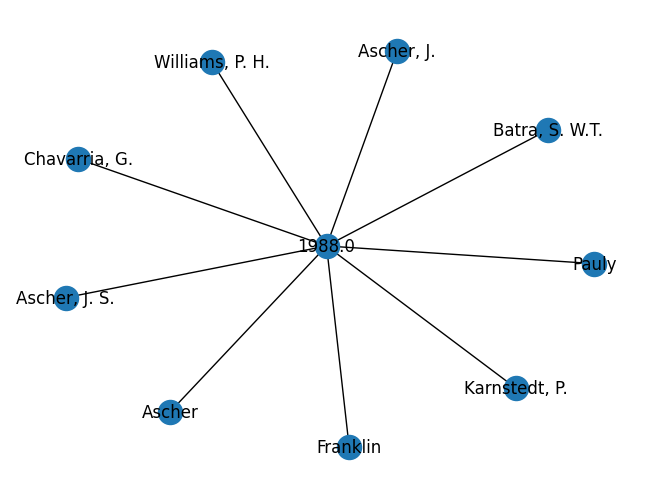

In [ ]:
year_1988 = df_cleaned[df_cleaned['year']== 1988]
H = nx.from_pandas_edgelist(year_1988, 'identifiedBy', 'year','recordedBy')
nx.draw_spring(H, with_labels=True)

## Finding similar location

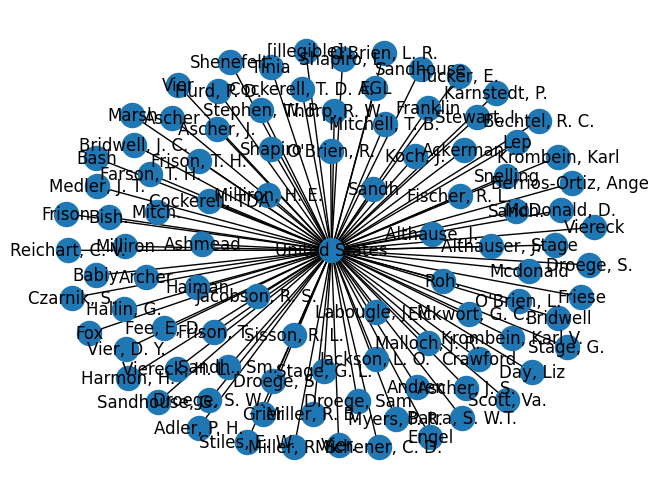

In [ ]:
year_brazil = df_cleaned[df_cleaned['country']== 'United States']
I = nx.from_pandas_edgelist(year_brazil, 'identifiedBy', 'country','recordedBy')
nx.draw_spring(I, with_labels=True)

# More filters

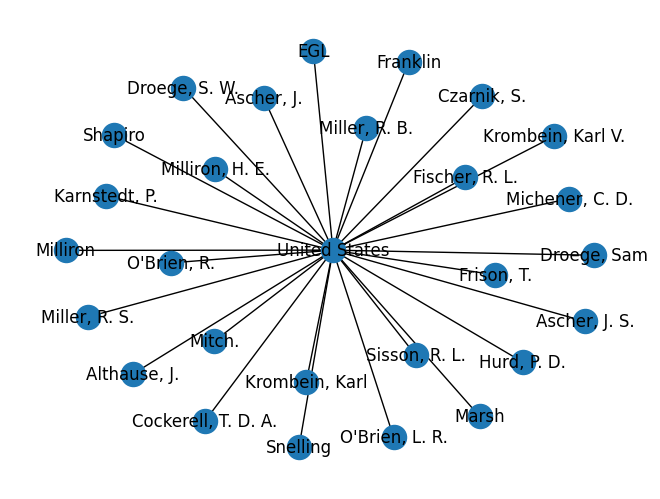

In [ ]:
year_country = df_cleaned[(df_cleaned['country']== 'United States') & (df_cleaned['year'].between(1940, 1960))]
J = nx.from_pandas_edgelist(year_country, 'identifiedBy', 'country','recordedBy')
nx.draw_spring(J, with_labels=True)